In [26]:
pip install wordcloud

In [27]:
pip install gensim

# **Import**

In [28]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [29]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [30]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_preprocessed.xlsx')
dataset.head()

Unnamed: 0.1  Unnamed: 0                             id_review  \
0             0           0  0Ay4eH9Vr4jS2CE7tK4BE1Vs9co3OD9hT2pg   
1             1           1  0BQ6Xi5iz8Wf4eX2PW6tQ9OS3mm8ZY7lU1Oz   
2             2           2  0Bf3Db0je6ZF7DB0RG6SF4JU2WN8dc3ni3cT   
3             3           5  0Ey1Dm3vB3fS1GA7Cr8Hs3bA8BT7Ut6Ke4xl   
4             4           6  0FL6IO5UE3LW7ZO4lL1IR4qm3gX4nU9iF4cv   

                                  review_clean_cased  \
0  Suka Bali area keluarga yang luar biasa x D me...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2  Lokasi paling pas liat sunrise harus datang se...   
3  Tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                  review_low_uncased  \
0  suka bali area keluarga yang luar biasa x d me...   
1  saya selalu berjalan di pantai sanur pada hari...   
2  lokasi paling pas liat sunrise harus datang se...   
3  tempatnya bagus selalu ramai oleh pengunjung s...   
4  pantai sanur banyak menyimpan misteri dan sang...   

                                              review attractions amenities  \
0  Suka Bali - area keluarga yang luar biasa_x000...        none      none   
1  Saya selalu berjalan di Pantai Sanur pada hari...     positif    netral   
2  Lokasi paling pas liat sunrise..harus datang s...     positif      none   
3  Tempatnya bagus, selalu ramai oleh pengunjung....     positif      none   
4  pantai sanur banyak menyimpan misteri dan sang...     positif      none   

  access    price  ...                                     amenities_text  \
0   none     none  ...                                               none   
1   none     none  ...  Setelah Anda berjalan anda dapat menikmati hid...   
2   none  positif  ...                                               none   
3   none     none  ...                                               none   
4   none     none  ...                                               none   

  access_text                                         price_text  \
0        none                                               none   
1        none                                               none   
2        none  Lokasi paling pas liat sunrise..harus datang s...   
3        none                                               none   
4        none                                               none   

                                      no_aspect_text  \
0  Suka Bali - area keluarga yang luar biasa menc...   
1  Saya selalu berjalan di Pantai Sanur pada hari...   
2                                               none   
3                                               none   
4                                               none   

                            cleaned_text_attractions  \
0                                               none   
1  lari tonton matahari terbit indah jalan inna g...   
2  lokasi pas liat sunrise jam santai bayar parki...   
3  tempat bagus ramai unjung salah pantai favorit...   
4  pantai sanur simpan misteri unjung lokal asing...   

                              cleaned_text_amenities cleaned_text_access  \
0                                               none                none   
1  jalan nikmat hidang lokal jalan nikmat hidang ...                none   
2                                               none                none   
3                                               none                none   
4                                               none                none   

                                  cleaned_text_price  \
0                                               none   
1                                               none   
2  lokasi pas liat sunrise jam santai bayar parki...   
3                                               none   
4                                               none   

                              cleaned_text_no_aspect  \
0  suka bal area keluarga cinta jalan bal tawar a

# **Aspek Attractions**

### **Text Negatif**

In [31]:
# Mengambil selain "none" dan mengambil "negative"
df_attractions = dataset[(dataset['attractions'] != 'none') & ((dataset['attractions'] == 'negatif'))]

df_attractions_negatif = df_attractions[['cleaned_text_attractions']].values
teks_negatif = df_attractions['cleaned_text_attractions']
print(teks_negatif)
# df_attractions_negative.head()

18      tidur kecewa pantai sanur lumut erti botol pla...
22      pantai kotor sampah cuci pantai terus ganggu b...
26      pantai sanur kondiainya beda jaman kotor saran...
35      pasir putih halus pandang ombak laut ang indah...
38      pantai bagus dreamland nelayan kotor pas viewn...
                              ...                        
1648    bagusss sayang sampah sayang sampah please unj...
1671                                    kotor ya kotor ya
1687                bagus kotor pantai bagus kotor pantai
1689    pas kesana pagi pagi jam set tempat kotor pas ...
1693    pantai bagus sayang sampah pantai bagus sayang...
Name: cleaned_text_attractions, Length: 170, dtype: object


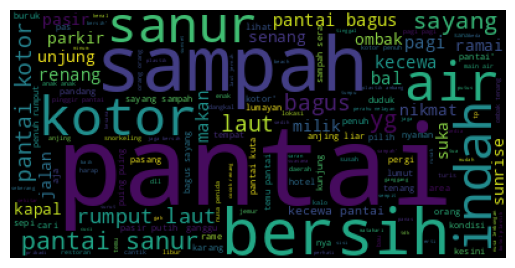

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(df_attractions_negatif))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [34]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_negatif = [tokenisasi(t) for t in teks_negatif]
print(tokens_negatif)

[['tidur', 'kecewa', 'pantai', 'sanur', 'lumut', 'erti', 'botol', 'plastik', 'kaleng', 'sampah', 'tidur', 'kecewa', 'pantai', 'sanur', 'lumut', 'erti', 'botol', 'plastik', 'kaleng', 'sampah', 'lumut', 'erti', 'botol', 'plastik', 'kaleng', 'sampah', 'sedih', 'temu', 'pantai', 'indah', 'taksi'], ['pantai', 'kotor', 'sampah', 'cuci', 'pantai', 'terus', 'ganggu', 'beda', 'foto', 'lihat', 'pantai', 'kotor', 'sampah', 'cuci', 'pantai', 'terus', 'ganggu', 'pantai', 'kotor', 'sampah', 'cuci', 'pantai', 'terus', 'ganggu'], ['pantai', 'sanur', 'kondiainya', 'beda', 'jaman', 'kotor', 'saran', 'kalo', 'area', 'pantai', 'bersih', 'sekitar', 'area', 'hotel', 'bintang', 'yg', 'pantai', 'grand', 'ina', 'bal', 'beach', 'area', 'puri', 'santri', 'hyatt', 'sana', 'bersih', 'pantai', 'relatif', 'jaga', 'pantai', 'sanur', 'kondiainya', 'beda', 'jaman', 'kotor', 'saran', 'kalo', 'area', 'pantai', 'bersih', 'sekitar', 'area', 'hotel', 'bintang', 'yg', 'pantai', 'grand', 'ina', 'bal', 'beach', 'area', 'puri',

In [35]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_negatif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_negatif]
# View
print(id2word)
print(corpus[:1])

Dictionary<719 unique tokens: ['botol', 'erti', 'indah', 'kaleng', 'kecewa']...>
[[(0, 3), (1, 3), (2, 1), (3, 3), (4, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2)]]


In [36]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('botol', 3),
  ('erti', 3),
  ('indah', 1),
  ('kaleng', 3),
  ('kecewa', 2),
  ('lumut', 3),
  ('pantai', 3),
  ('plastik', 3),
  ('sampah', 3),
  ('sanur', 2),
  ('sedih', 1),
  ('taksi', 1),
  ('temu', 1),
  ('tidur', 2)]]

In [37]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=5,random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [38]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

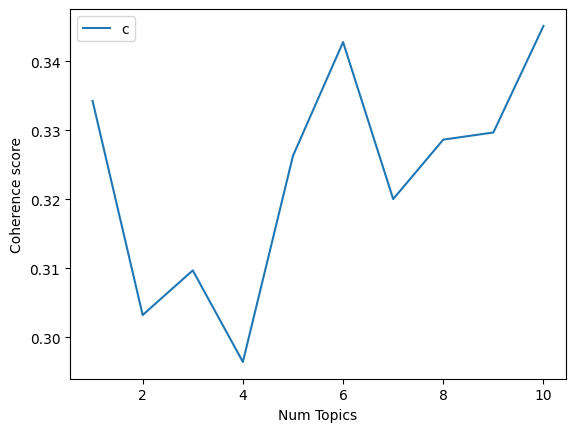

coherence_values:  [0.3342799747213328, 0.30322036587142404, 0.3096900541416984, 0.29641448768456913, 0.3263111164971235, 0.34281283018073755, 0.32004285927905524, 0.3286610873507802, 0.32969829001396467, 0.3451574783712799]


In [39]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_negatif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

In [40]:
lda_model.print_topics() #num_word default is 10
#lda_model.show_topics() #ini juga bisa

[(0,
  '0.099*"pantai" + 0.044*"sampah" + 0.034*"indah" + 0.033*"bersih" + 0.026*"sanur" + 0.023*"sayang" + 0.017*"bal" + 0.015*"yg" + 0.014*"kotor" + 0.014*"jaga"'),
 (1,
  '0.079*"pantai" + 0.039*"bersih" + 0.039*"sanur" + 0.024*"air" + 0.023*"pagi" + 0.023*"laut" + 0.021*"kotor" + 0.017*"sayang" + 0.016*"pasir" + 0.013*"penuh"'),
 (2,
  '0.060*"sampah" + 0.049*"pantai" + 0.026*"bagus" + 0.026*"indah" + 0.021*"kotor" + 0.021*"laut" + 0.020*"sayang" + 0.019*"air" + 0.017*"kecewa" + 0.017*"unjung"'),
 (3,
  '0.103*"pantai" + 0.035*"orang" + 0.026*"kotor" + 0.026*"sanur" + 0.021*"bersih" + 0.020*"sampah" + 0.019*"bagus" + 0.013*"sayang" + 0.013*"milik" + 0.012*"area"'),
 (4,
  '0.103*"pantai" + 0.028*"kotor" + 0.027*"bagus" + 0.018*"sayang" + 0.017*"sampah" + 0.014*"tempat" + 0.012*"yg" + 0.011*"sunrise" + 0.011*"ganggu" + 0.011*"ombak"')]

In [41]:
print("Topic distribution for document :", " ".join(tokens_negatif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : tidur kecewa pantai sanur lumut erti botol plastik kaleng sampah tidur kecewa pantai sanur lumut erti botol plastik kaleng sampah lumut erti botol plastik kaleng sampah sedih temu pantai indah taksi
feature of each token: [('botol', 3), ('erti', 3), ('indah', 1), ('kaleng', 3), ('kecewa', 2), ('lumut', 3), ('pantai', 3), ('plastik', 3), ('sampah', 3), ('sanur', 2), ('sedih', 1), ('taksi', 1), ('temu', 1), ('tidur', 2)]


[(2, 0.40609875), (3, 0.57469773)]

In [44]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)   # tambahkan indeks [0] pada variabel row

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_negatif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Colab Notebooks/doc_topic_dominant_attractions_negative.csv')
# Show
df_dominant_topic.head(5)

<ipython-input-44-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-44-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-44-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-44-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               3              0.5747   
1            1               4              0.5063   
2            2               3              0.8779   
3            3               2              0.9738   
4            4               1              0.9736   

                         Topic Keywords  \
0   pantai, orang, kotor, sanur, bersih   
1  pantai, kotor, bagus, sayang, sampah   
2   pantai, orang, kotor, sanur, bersih   
3   sampah, pantai, bagus, indah, kotor   
4      pantai, bersih, sanur, air, pagi   

                                                Text  
0  [tidur, kecewa, pantai, sanur, lumut, erti, bo...  
1  [pantai, kotor, sampah, cuci, pantai, terus, g...  
2  [pantai, sanur, kondiainya, beda, jaman, kotor...  
3  [pasir, putih, halus, pandang, ombak, laut, an...  
4  [pantai, bagus, dreamland, nelayan, kotor, pas...

In [45]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_negatif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3263111164971235


In [46]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)


Coherence Per Topic Score:  [0.3430637890014468, 0.23944642487933981, 0.4120841361392446, 0.36945063363542563, 0.2675105988301607]


In [47]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 36.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [48]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [49]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.000462  0.097087       1        1  28.734176
4     -0.024339 -0.002833       2        1  18.623354
2      0.184040  0.007245       3        1  18.256176
3     -0.123881  0.058562       4        1  17.282205
0     -0.036283 -0.160062       5        1  17.104088, topic_info=       Term        Freq       Total Category  logprob  loglift
71    orang   34.000000   34.000000  Default  30.0000  30.0000
2     indah   62.000000   62.000000  Default  29.0000  29.0000
8    sampah  151.000000  151.000000  Default  28.0000  28.0000
24   bersih  118.000000  118.000000  Default  27.0000  27.0000
6    pantai  461.000000  461.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
70    milik    5.676646   27.773529   Topic5  -5.0923   0.1781
138   surut    4.876340   12.061341   Topic5  -5.2443   0.8602
67   karang    5.076111   19.965501   Topic5  -5.2041   0.3964
69    makan    5.166002   29.521804   Topic5  -5.1866   0.0228
129     air    5.309380   65.928216   Topic5  -5.1592  -0.7532

[326 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
623       1  0.687198      
623       2  0.057266      
623       3  0.229066      
628       3  0.828083    ad
584       4  0.817890  adab
...     ...       ...   ...
40        1  0.317225    yg
40        2  0.237919    yg
40        3  0.158612    yg
40        4  0.019827    yg
40        5  0.277572    yg

[424 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])